In [1]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt

In [2]:
InputPath = ""
X = pickle.load(open(InputPath+"X.pickle","rb"))
y = pickle.load(open(InputPath+"y.pickle","rb"))

In [3]:
X = X/255.0
y = tf.keras.utils.to_categorical(y).astype(int)
print(X.shape)
print(y.shape)

(875, 50, 50, 3)
(875, 5)


In [4]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

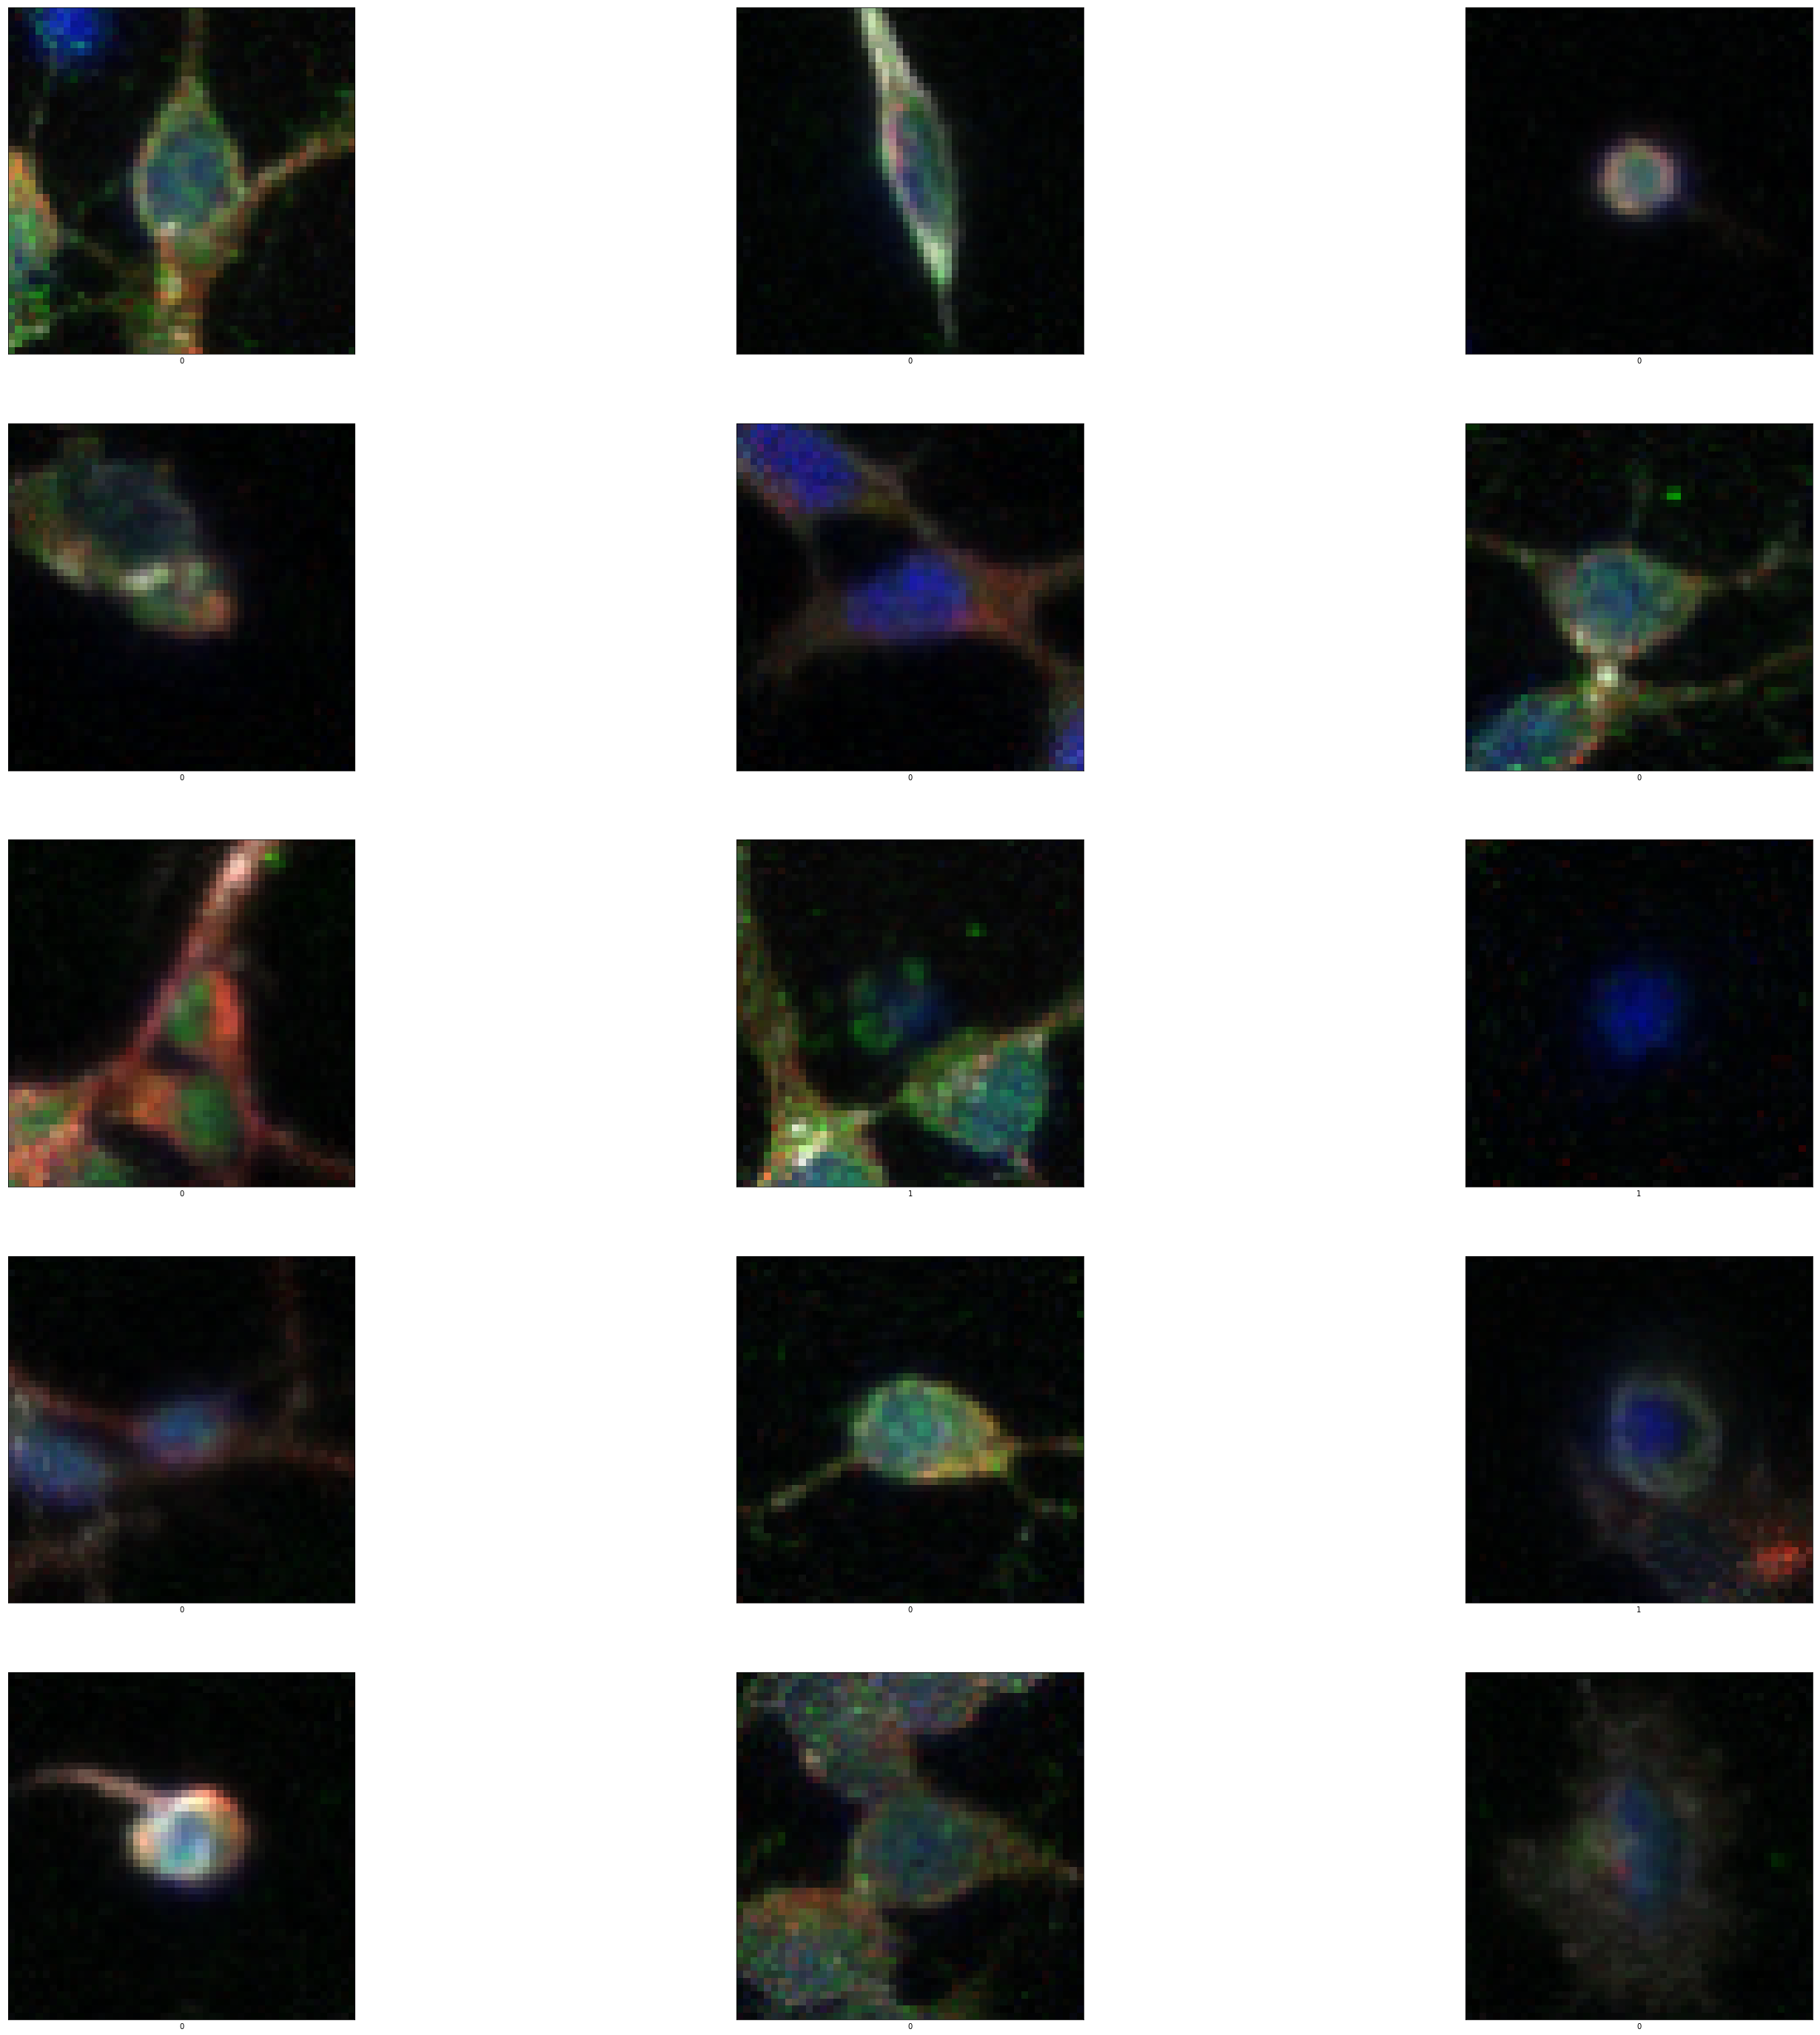

In [5]:
plt.figure(figsize=(50,50))
for i in range(15):
    plt.subplot(5,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i], cmap=plt.cm.binary)
    plt.xlabel(str(train_y[i][0]))
plt.show()

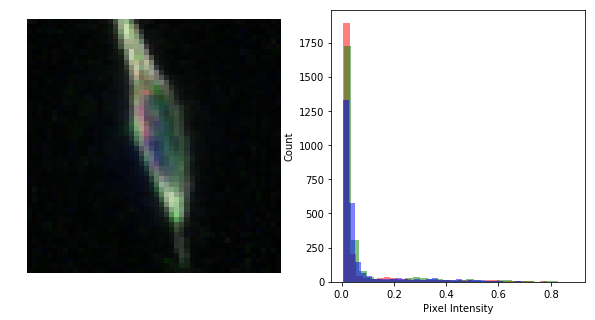

In [6]:
def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
plotHistogram(train_X[1])

In [7]:
import time
NAME = "Cnn64x2-{}-fix_X_withActivation".format(int(time.time()))

In [8]:
# gpu_option = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
# sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [9]:
# weights = [175, 290, 326, 220, 576]
# total = sum(weights)
# weights[:] = [x / total for x in weights]
# print(weights)
# classWeights = { i : weights[i] for i in range(0, len(weights) ) }
# classWeights

In [10]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME))

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
import cv2, numpy as np

def model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(50,50,3),strides=1))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    return model

model = model()

W1119 16:24:14.005133 140352629298944 deprecation.py:506] From /home/mzouink/miniconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4333696   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [13]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False) 

In [ ]:
history = model.fit(datagen.flow(train_X, train_y, batch_size=32), epochs=10000, 
                    validation_data=(test_X, test_y))

Epoch 1/10000
22/22 [==============================] - 2s 90ms/step - loss: 1.6089 - acc: 0.1900 - val_loss: 1.6088 - val_acc: 0.2286
Epoch 2/10000
22/22 [==============================] - 1s 24ms/step - loss: 1.6057 - acc: 0.1957 - val_loss: 1.6079 - val_acc: 0.2457
Epoch 3/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.6062 - acc: 0.2257 - val_loss: 1.6066 - val_acc: 0.2629
Epoch 4/10000
22/22 [==============================] - 1s 30ms/step - loss: 1.6041 - acc: 0.2100 - val_loss: 1.6056 - val_acc: 0.2686
Epoch 5/10000
22/22 [==============================] - 1s 30ms/step - loss: 1.6042 - acc: 0.2214 - val_loss: 1.6046 - val_acc: 0.2743
Epoch 6/10000
22/22 [==============================] - 1s 24ms/step - loss: 1.6012 - acc: 0.2314 - val_loss: 1.6037 - val_acc: 0.2686
Epoch 7/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.6013 - acc: 0.2371 - val_loss: 1.6028 - val_acc: 0.2686
Epoch 8/10000
22/22 [==============================] - 1s 28ms

Epoch 62/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.5653 - acc: 0.2914 - val_loss: 1.5657 - val_acc: 0.3200
Epoch 63/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.5611 - acc: 0.2929 - val_loss: 1.5652 - val_acc: 0.3200
Epoch 64/10000
22/22 [==============================] - 1s 30ms/step - loss: 1.5621 - acc: 0.2986 - val_loss: 1.5646 - val_acc: 0.3200
Epoch 65/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.5645 - acc: 0.2871 - val_loss: 1.5640 - val_acc: 0.3200
Epoch 66/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.5586 - acc: 0.2871 - val_loss: 1.5634 - val_acc: 0.3257
Epoch 67/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.5611 - acc: 0.3043 - val_loss: 1.5628 - val_acc: 0.3257
Epoch 68/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.5595 - acc: 0.3000 - val_loss: 1.5623 - val_acc: 0.3257
Epoch 69/10000
22/22 [==============================] -

22/22 [==============================] - 1s 27ms/step - loss: 1.4891 - acc: 0.3614 - val_loss: 1.4867 - val_acc: 0.3771
Epoch 183/10000
22/22 [==============================] - 1s 26ms/step - loss: 1.4833 - acc: 0.3843 - val_loss: 1.4860 - val_acc: 0.3771
Epoch 184/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.4843 - acc: 0.3957 - val_loss: 1.4853 - val_acc: 0.3829
Epoch 185/10000
22/22 [==============================] - 1s 30ms/step - loss: 1.4764 - acc: 0.3857 - val_loss: 1.4845 - val_acc: 0.3829
Epoch 186/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.4784 - acc: 0.3743 - val_loss: 1.4837 - val_acc: 0.3829
Epoch 187/10000
22/22 [==============================] - 1s 30ms/step - loss: 1.4803 - acc: 0.3900 - val_loss: 1.4829 - val_acc: 0.3829
Epoch 188/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.4751 - acc: 0.4057 - val_loss: 1.4820 - val_acc: 0.3829
Epoch 189/10000
22/22 [==============================] - 1s 28ms

22/22 [==============================] - 1s 28ms/step - loss: 1.3694 - acc: 0.4857 - val_loss: 1.3892 - val_acc: 0.4514
Epoch 303/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.3805 - acc: 0.4800 - val_loss: 1.3884 - val_acc: 0.4514
Epoch 304/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.3730 - acc: 0.4657 - val_loss: 1.3875 - val_acc: 0.4514
Epoch 305/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.3738 - acc: 0.4586 - val_loss: 1.3867 - val_acc: 0.4514
Epoch 306/10000
22/22 [==============================] - 1s 26ms/step - loss: 1.3663 - acc: 0.4743 - val_loss: 1.3859 - val_acc: 0.4514
Epoch 307/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.3728 - acc: 0.4871 - val_loss: 1.3786 - val_acc: 0.4571
Epoch 308/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.3745 - acc: 0.4657 - val_loss: 1.3844 - val_acc: 0.4629
Epoch 309/10000
22/22 [==============================] - 1s 28ms

22/22 [==============================] - 1s 28ms/step - loss: 1.2659 - acc: 0.5271 - val_loss: 1.3002 - val_acc: 0.5257
Epoch 423/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.2817 - acc: 0.5271 - val_loss: 1.2996 - val_acc: 0.5314
Epoch 424/10000
22/22 [==============================] - 1s 26ms/step - loss: 1.2894 - acc: 0.5043 - val_loss: 1.2989 - val_acc: 0.5314
Epoch 425/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.2964 - acc: 0.4671 - val_loss: 1.2982 - val_acc: 0.5314
Epoch 426/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.2751 - acc: 0.5100 - val_loss: 1.2976 - val_acc: 0.5314
Epoch 427/10000
22/22 [==============================] - 1s 25ms/step - loss: 1.2751 - acc: 0.5029 - val_loss: 1.2970 - val_acc: 0.5371
Epoch 428/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.2889 - acc: 0.4757 - val_loss: 1.2964 - val_acc: 0.5371
Epoch 429/10000
22/22 [==============================] - 1s 28ms

22/22 [==============================] - 1s 27ms/step - loss: 1.2342 - acc: 0.4986 - val_loss: 1.2349 - val_acc: 0.5657
Epoch 543/10000
22/22 [==============================] - 1s 26ms/step - loss: 1.2129 - acc: 0.5286 - val_loss: 1.2346 - val_acc: 0.5657
Epoch 544/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.2039 - acc: 0.5257 - val_loss: 1.2341 - val_acc: 0.5657
Epoch 545/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.2305 - acc: 0.5143 - val_loss: 1.2339 - val_acc: 0.5657
Epoch 546/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.2048 - acc: 0.5186 - val_loss: 1.2335 - val_acc: 0.5657
Epoch 547/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.2235 - acc: 0.5029 - val_loss: 1.2332 - val_acc: 0.5657
Epoch 548/10000
22/22 [==============================] - 1s 31ms/step - loss: 1.1777 - acc: 0.5171 - val_loss: 1.2328 - val_acc: 0.5657
Epoch 549/10000
22/22 [==============================] - 1s 27ms

22/22 [==============================] - 1s 28ms/step - loss: 1.1497 - acc: 0.5629 - val_loss: 1.1926 - val_acc: 0.5829
Epoch 663/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.1641 - acc: 0.5629 - val_loss: 1.1924 - val_acc: 0.5829
Epoch 664/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.1737 - acc: 0.5343 - val_loss: 1.1921 - val_acc: 0.5829
Epoch 665/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.1559 - acc: 0.5443 - val_loss: 1.1918 - val_acc: 0.5829
Epoch 666/10000
22/22 [==============================] - 1s 32ms/step - loss: 1.1506 - acc: 0.5500 - val_loss: 1.1914 - val_acc: 0.5943
Epoch 667/10000
22/22 [==============================] - 1s 30ms/step - loss: 1.1520 - acc: 0.5414 - val_loss: 1.1911 - val_acc: 0.5886
Epoch 668/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.1691 - acc: 0.5514 - val_loss: 1.1906 - val_acc: 0.5829
Epoch 669/10000
22/22 [==============================] - 1s 24ms

22/22 [==============================] - 1s 27ms/step - loss: 1.1531 - acc: 0.5429 - val_loss: 1.1625 - val_acc: 0.6057
Epoch 783/10000
22/22 [==============================] - 1s 25ms/step - loss: 1.1295 - acc: 0.5786 - val_loss: 1.1622 - val_acc: 0.6114
Epoch 784/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.1297 - acc: 0.5443 - val_loss: 1.1621 - val_acc: 0.6057
Epoch 785/10000
22/22 [==============================] - 1s 24ms/step - loss: 1.1507 - acc: 0.5514 - val_loss: 1.1621 - val_acc: 0.6000
Epoch 786/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.1564 - acc: 0.5271 - val_loss: 1.1619 - val_acc: 0.5943
Epoch 787/10000
22/22 [==============================] - 1s 30ms/step - loss: 1.1343 - acc: 0.5471 - val_loss: 1.1618 - val_acc: 0.5943
Epoch 788/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.1341 - acc: 0.5500 - val_loss: 1.1617 - val_acc: 0.5943
Epoch 789/10000
22/22 [==============================] - 1s 27ms

22/22 [==============================] - 1s 27ms/step - loss: 1.1170 - acc: 0.5686 - val_loss: 1.1409 - val_acc: 0.6114
Epoch 903/10000
22/22 [==============================] - 1s 30ms/step - loss: 1.1112 - acc: 0.5643 - val_loss: 1.1407 - val_acc: 0.6114
Epoch 904/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.1076 - acc: 0.5643 - val_loss: 1.1403 - val_acc: 0.6171
Epoch 905/10000
22/22 [==============================] - 1s 26ms/step - loss: 1.1233 - acc: 0.5629 - val_loss: 1.1402 - val_acc: 0.6171
Epoch 906/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.1112 - acc: 0.5571 - val_loss: 1.1402 - val_acc: 0.6171
Epoch 907/10000
22/22 [==============================] - 1s 30ms/step - loss: 1.1198 - acc: 0.5500 - val_loss: 1.1401 - val_acc: 0.6229
Epoch 908/10000
22/22 [==============================] - 1s 31ms/step - loss: 1.1078 - acc: 0.5571 - val_loss: 1.1401 - val_acc: 0.6229
Epoch 909/10000
22/22 [==============================] - 1s 29ms

22/22 [==============================] - 1s 28ms/step - loss: 1.0983 - acc: 0.5643 - val_loss: 1.1243 - val_acc: 0.6229
Epoch 1023/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.0842 - acc: 0.5686 - val_loss: 1.1242 - val_acc: 0.6286
Epoch 1024/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.1065 - acc: 0.5600 - val_loss: 1.1241 - val_acc: 0.6286
Epoch 1025/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.0987 - acc: 0.5500 - val_loss: 1.1239 - val_acc: 0.6286
Epoch 1026/10000
22/22 [==============================] - 1s 31ms/step - loss: 1.0830 - acc: 0.5857 - val_loss: 1.1238 - val_acc: 0.6286
Epoch 1027/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.0800 - acc: 0.5571 - val_loss: 1.1236 - val_acc: 0.6229
Epoch 1028/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.0894 - acc: 0.5614 - val_loss: 1.0996 - val_acc: 0.6286
Epoch 1029/10000
22/22 [==============================] - 

Epoch 1082/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.0776 - acc: 0.5914 - val_loss: 1.1170 - val_acc: 0.6286
Epoch 1083/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.0838 - acc: 0.5829 - val_loss: 1.1170 - val_acc: 0.6343
Epoch 1084/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.0805 - acc: 0.5657 - val_loss: 1.1170 - val_acc: 0.6343
Epoch 1085/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.0779 - acc: 0.5729 - val_loss: 1.1169 - val_acc: 0.6286
Epoch 1086/10000
22/22 [==============================] - 1s 26ms/step - loss: 1.0782 - acc: 0.5714 - val_loss: 1.1166 - val_acc: 0.6343
Epoch 1087/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.1007 - acc: 0.5543 - val_loss: 1.1164 - val_acc: 0.6343
Epoch 1088/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.0564 - acc: 0.5957 - val_loss: 1.0925 - val_acc: 0.6343
Epoch 1089/10000
22/22 [=================

Epoch 1142/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.0719 - acc: 0.5743 - val_loss: 1.1104 - val_acc: 0.6343
Epoch 1143/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.0671 - acc: 0.5729 - val_loss: 1.1104 - val_acc: 0.6343
Epoch 1144/10000
22/22 [==============================] - 1s 26ms/step - loss: 1.0678 - acc: 0.5786 - val_loss: 1.1103 - val_acc: 0.6343
Epoch 1145/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.0832 - acc: 0.5743 - val_loss: 1.1103 - val_acc: 0.6343
Epoch 1146/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.0935 - acc: 0.5414 - val_loss: 1.1102 - val_acc: 0.6343
Epoch 1147/10000
22/22 [==============================] - 1s 25ms/step - loss: 1.0529 - acc: 0.5686 - val_loss: 1.1104 - val_acc: 0.6343
Epoch 1148/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.0725 - acc: 0.5671 - val_loss: 1.1104 - val_acc: 0.6343
Epoch 1149/10000
22/22 [=================

Epoch 1202/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.0683 - acc: 0.5800 - val_loss: 1.1066 - val_acc: 0.6286
Epoch 1203/10000
22/22 [==============================] - 1s 24ms/step - loss: 1.0516 - acc: 0.6071 - val_loss: 1.1065 - val_acc: 0.6286
Epoch 1204/10000
22/22 [==============================] - 1s 31ms/step - loss: 1.0473 - acc: 0.5814 - val_loss: 1.1067 - val_acc: 0.6286
Epoch 1205/10000
22/22 [==============================] - 1s 26ms/step - loss: 1.0631 - acc: 0.5914 - val_loss: 1.1065 - val_acc: 0.6286
Epoch 1206/10000
22/22 [==============================] - 1s 25ms/step - loss: 1.0706 - acc: 0.5743 - val_loss: 1.1064 - val_acc: 0.6286
Epoch 1207/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.0457 - acc: 0.5900 - val_loss: 1.1064 - val_acc: 0.6286
Epoch 1208/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.0873 - acc: 0.5686 - val_loss: 1.0822 - val_acc: 0.6286
Epoch 1209/10000
22/22 [=================

Epoch 1262/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.0425 - acc: 0.5886 - val_loss: 1.1023 - val_acc: 0.6286
Epoch 1263/10000
22/22 [==============================] - 1s 26ms/step - loss: 1.0528 - acc: 0.5771 - val_loss: 1.1022 - val_acc: 0.6286
Epoch 1264/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.0633 - acc: 0.6000 - val_loss: 1.1021 - val_acc: 0.6286
Epoch 1265/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.0516 - acc: 0.5929 - val_loss: 1.1022 - val_acc: 0.6286
Epoch 1266/10000
22/22 [==============================] - 1s 26ms/step - loss: 1.0770 - acc: 0.5829 - val_loss: 1.1022 - val_acc: 0.6286
Epoch 1267/10000
22/22 [==============================] - 1s 30ms/step - loss: 1.0630 - acc: 0.5771 - val_loss: 1.1022 - val_acc: 0.6286
Epoch 1268/10000
22/22 [==============================] - 1s 25ms/step - loss: 1.0616 - acc: 0.5829 - val_loss: 1.1021 - val_acc: 0.6286
Epoch 1269/10000
22/22 [=================

Epoch 1322/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.0430 - acc: 0.5829 - val_loss: 1.0963 - val_acc: 0.6286
Epoch 1323/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.0550 - acc: 0.5814 - val_loss: 1.0963 - val_acc: 0.6286
Epoch 1324/10000
22/22 [==============================] - 1s 30ms/step - loss: 1.0525 - acc: 0.5729 - val_loss: 1.0962 - val_acc: 0.6286
Epoch 1325/10000
22/22 [==============================] - 1s 24ms/step - loss: 1.0544 - acc: 0.5771 - val_loss: 1.0961 - val_acc: 0.6286
Epoch 1326/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.0520 - acc: 0.6043 - val_loss: 1.0961 - val_acc: 0.6286
Epoch 1327/10000
22/22 [==============================] - 1s 31ms/step - loss: 1.0513 - acc: 0.5829 - val_loss: 1.0959 - val_acc: 0.6286
Epoch 1328/10000
22/22 [==============================] - 1s 26ms/step - loss: 1.0537 - acc: 0.5829 - val_loss: 1.0958 - val_acc: 0.6286
Epoch 1329/10000
22/22 [=================

Epoch 1382/10000
22/22 [==============================] - 1s 26ms/step - loss: 1.0565 - acc: 0.5914 - val_loss: 1.0911 - val_acc: 0.6286
Epoch 1383/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.0307 - acc: 0.5714 - val_loss: 1.0910 - val_acc: 0.6286
Epoch 1384/10000
22/22 [==============================] - 1s 26ms/step - loss: 1.0548 - acc: 0.5829 - val_loss: 1.0909 - val_acc: 0.6286
Epoch 1385/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.0386 - acc: 0.5857 - val_loss: 1.0908 - val_acc: 0.6286
Epoch 1386/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.0409 - acc: 0.5814 - val_loss: 1.0911 - val_acc: 0.6286
Epoch 1387/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.0413 - acc: 0.5886 - val_loss: 1.0911 - val_acc: 0.6286
Epoch 1388/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.0330 - acc: 0.5814 - val_loss: 1.0912 - val_acc: 0.6286
Epoch 1389/10000
22/22 [=================

Epoch 1442/10000
22/22 [==============================] - 1s 32ms/step - loss: 1.0461 - acc: 0.6043 - val_loss: 1.0862 - val_acc: 0.6286
Epoch 1443/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.0621 - acc: 0.5686 - val_loss: 1.0861 - val_acc: 0.6286
Epoch 1444/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.0231 - acc: 0.5943 - val_loss: 1.0861 - val_acc: 0.6286
Epoch 1445/10000
22/22 [==============================] - 1s 26ms/step - loss: 1.0437 - acc: 0.5871 - val_loss: 1.0862 - val_acc: 0.6286
Epoch 1446/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.0447 - acc: 0.5929 - val_loss: 1.0861 - val_acc: 0.6286
Epoch 1447/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.0627 - acc: 0.5500 - val_loss: 1.0859 - val_acc: 0.6286
Epoch 1448/10000
22/22 [==============================] - 1s 31ms/step - loss: 1.0309 - acc: 0.5900 - val_loss: 1.0859 - val_acc: 0.6286
Epoch 1449/10000
22/22 [=================

Epoch 1502/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.0171 - acc: 0.5871 - val_loss: 1.0847 - val_acc: 0.6229
Epoch 1503/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.0351 - acc: 0.5957 - val_loss: 1.0846 - val_acc: 0.6229
Epoch 1504/10000
22/22 [==============================] - 1s 30ms/step - loss: 1.0170 - acc: 0.5943 - val_loss: 1.0846 - val_acc: 0.6171
Epoch 1505/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.0161 - acc: 0.6100 - val_loss: 1.0849 - val_acc: 0.6171
Epoch 1506/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.0347 - acc: 0.5900 - val_loss: 1.0849 - val_acc: 0.6171
Epoch 1507/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.0309 - acc: 0.6043 - val_loss: 1.0849 - val_acc: 0.6171
Epoch 1508/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.0406 - acc: 0.5771 - val_loss: 1.0846 - val_acc: 0.6171
Epoch 1509/10000
22/22 [=================

Epoch 1562/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.0433 - acc: 0.5886 - val_loss: 1.0810 - val_acc: 0.6229
Epoch 1563/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.0155 - acc: 0.6114 - val_loss: 1.0811 - val_acc: 0.6229
Epoch 1564/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.0249 - acc: 0.5857 - val_loss: 1.0809 - val_acc: 0.6229
Epoch 1565/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.0117 - acc: 0.6043 - val_loss: 1.0809 - val_acc: 0.6171
Epoch 1566/10000
22/22 [==============================] - 1s 25ms/step - loss: 1.0186 - acc: 0.5957 - val_loss: 1.0807 - val_acc: 0.6171
Epoch 1567/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.0154 - acc: 0.6129 - val_loss: 1.0571 - val_acc: 0.6171
Epoch 1568/10000
22/22 [==============================] - 1s 30ms/step - loss: 1.0054 - acc: 0.6029 - val_loss: 1.0805 - val_acc: 0.6171
Epoch 1569/10000
22/22 [=================

Epoch 1622/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.0292 - acc: 0.5900 - val_loss: 1.0771 - val_acc: 0.6114
Epoch 1623/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.0538 - acc: 0.5829 - val_loss: 1.0773 - val_acc: 0.6114
Epoch 1624/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.0139 - acc: 0.5929 - val_loss: 1.0772 - val_acc: 0.6114
Epoch 1625/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.0267 - acc: 0.6100 - val_loss: 1.0770 - val_acc: 0.6114
Epoch 1626/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.0145 - acc: 0.6086 - val_loss: 1.0771 - val_acc: 0.6114
Epoch 1627/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.0083 - acc: 0.6143 - val_loss: 1.0769 - val_acc: 0.6114
Epoch 1628/10000
22/22 [==============================] - 1s 30ms/step - loss: 1.0116 - acc: 0.5986 - val_loss: 1.0767 - val_acc: 0.6114
Epoch 1629/10000
22/22 [=================

Epoch 1682/10000
22/22 [==============================] - 1s 30ms/step - loss: 1.0167 - acc: 0.5657 - val_loss: 1.0751 - val_acc: 0.6171
Epoch 1683/10000
22/22 [==============================] - 1s 25ms/step - loss: 1.0053 - acc: 0.5971 - val_loss: 1.0748 - val_acc: 0.6229
Epoch 1684/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.0266 - acc: 0.5971 - val_loss: 1.0748 - val_acc: 0.6229
Epoch 1685/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.0110 - acc: 0.6029 - val_loss: 1.0746 - val_acc: 0.6229
Epoch 1686/10000
22/22 [==============================] - 1s 30ms/step - loss: 1.0251 - acc: 0.6029 - val_loss: 1.0749 - val_acc: 0.6229
Epoch 1687/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.0360 - acc: 0.5929 - val_loss: 1.0751 - val_acc: 0.6171
Epoch 1688/10000
22/22 [==============================] - 1s 26ms/step - loss: 1.0123 - acc: 0.6186 - val_loss: 1.0753 - val_acc: 0.6171
Epoch 1689/10000
22/22 [=================

Epoch 1742/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9992 - acc: 0.6114 - val_loss: 1.0721 - val_acc: 0.6229
Epoch 1743/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.0158 - acc: 0.5943 - val_loss: 1.0720 - val_acc: 0.6229
Epoch 1744/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.0341 - acc: 0.5743 - val_loss: 1.0720 - val_acc: 0.6229
Epoch 1745/10000
22/22 [==============================] - 1s 26ms/step - loss: 1.0214 - acc: 0.5829 - val_loss: 1.0720 - val_acc: 0.6229
Epoch 1746/10000
22/22 [==============================] - 1s 32ms/step - loss: 1.0310 - acc: 0.5857 - val_loss: 1.0721 - val_acc: 0.6229
Epoch 1747/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.0057 - acc: 0.6029 - val_loss: 1.0719 - val_acc: 0.6229
Epoch 1748/10000
22/22 [==============================] - 1s 25ms/step - loss: 0.9956 - acc: 0.6014 - val_loss: 1.0717 - val_acc: 0.6229
Epoch 1749/10000
22/22 [=================

Epoch 1802/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.0038 - acc: 0.5986 - val_loss: 1.0703 - val_acc: 0.6229
Epoch 1803/10000
22/22 [==============================] - 1s 26ms/step - loss: 1.0112 - acc: 0.6100 - val_loss: 1.0704 - val_acc: 0.6229
Epoch 1804/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.0268 - acc: 0.6000 - val_loss: 1.0702 - val_acc: 0.6229
Epoch 1805/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.0164 - acc: 0.5871 - val_loss: 1.0701 - val_acc: 0.6229
Epoch 1806/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.0193 - acc: 0.5943 - val_loss: 1.0701 - val_acc: 0.6229
Epoch 1807/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9941 - acc: 0.6129 - val_loss: 1.0700 - val_acc: 0.6229
Epoch 1808/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.0219 - acc: 0.5800 - val_loss: 1.0698 - val_acc: 0.6229
Epoch 1809/10000
22/22 [=================

Epoch 1862/10000
22/22 [==============================] - 1s 26ms/step - loss: 1.0148 - acc: 0.6014 - val_loss: 1.0676 - val_acc: 0.6171
Epoch 1863/10000
22/22 [==============================] - 1s 30ms/step - loss: 0.9933 - acc: 0.6000 - val_loss: 1.0674 - val_acc: 0.6171
Epoch 1864/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9980 - acc: 0.6243 - val_loss: 1.0675 - val_acc: 0.6171
Epoch 1865/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.0029 - acc: 0.5957 - val_loss: 1.0678 - val_acc: 0.6171
Epoch 1866/10000
22/22 [==============================] - 1s 31ms/step - loss: 1.0132 - acc: 0.5900 - val_loss: 1.0676 - val_acc: 0.6171
Epoch 1867/10000
22/22 [==============================] - 1s 24ms/step - loss: 1.0047 - acc: 0.6043 - val_loss: 1.0677 - val_acc: 0.6229
Epoch 1868/10000
22/22 [==============================] - 1s 30ms/step - loss: 1.0116 - acc: 0.5914 - val_loss: 1.0677 - val_acc: 0.6171
Epoch 1869/10000
22/22 [=================

Epoch 1922/10000
22/22 [==============================] - 1s 33ms/step - loss: 0.9860 - acc: 0.6371 - val_loss: 1.0653 - val_acc: 0.6171
Epoch 1923/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9999 - acc: 0.6114 - val_loss: 1.0653 - val_acc: 0.6229
Epoch 1924/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9998 - acc: 0.5971 - val_loss: 1.0652 - val_acc: 0.6171
Epoch 1925/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.0004 - acc: 0.6000 - val_loss: 1.0651 - val_acc: 0.6171
Epoch 1926/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9815 - acc: 0.6329 - val_loss: 1.0653 - val_acc: 0.6171
Epoch 1927/10000
22/22 [==============================] - 1s 30ms/step - loss: 1.0094 - acc: 0.6029 - val_loss: 1.0656 - val_acc: 0.6229
Epoch 1928/10000
22/22 [==============================] - 1s 25ms/step - loss: 1.0264 - acc: 0.6014 - val_loss: 1.0656 - val_acc: 0.6229
Epoch 1929/10000
22/22 [=================

Epoch 1982/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9858 - acc: 0.6229 - val_loss: 1.0642 - val_acc: 0.6229
Epoch 1983/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.0004 - acc: 0.5929 - val_loss: 1.0640 - val_acc: 0.6229
Epoch 1984/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9952 - acc: 0.6200 - val_loss: 1.0637 - val_acc: 0.6229
Epoch 1985/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9871 - acc: 0.6214 - val_loss: 1.0637 - val_acc: 0.6229
Epoch 1986/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9834 - acc: 0.6143 - val_loss: 1.0636 - val_acc: 0.6229
Epoch 1987/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9683 - acc: 0.6229 - val_loss: 1.0631 - val_acc: 0.6171
Epoch 1988/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9560 - acc: 0.6186 - val_loss: 1.0634 - val_acc: 0.6229
Epoch 1989/10000
22/22 [=================

Epoch 2042/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9690 - acc: 0.6171 - val_loss: 1.0611 - val_acc: 0.6229
Epoch 2043/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9791 - acc: 0.6071 - val_loss: 1.0611 - val_acc: 0.6229
Epoch 2044/10000
22/22 [==============================] - 1s 31ms/step - loss: 0.9903 - acc: 0.6171 - val_loss: 1.0613 - val_acc: 0.6229
Epoch 2045/10000
22/22 [==============================] - 1s 24ms/step - loss: 0.9909 - acc: 0.5914 - val_loss: 1.0613 - val_acc: 0.6229
Epoch 2046/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9893 - acc: 0.6271 - val_loss: 1.0613 - val_acc: 0.6171
Epoch 2047/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9868 - acc: 0.6200 - val_loss: 1.0610 - val_acc: 0.6229
Epoch 2048/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9789 - acc: 0.6229 - val_loss: 1.0610 - val_acc: 0.6229
Epoch 2049/10000
22/22 [=================

Epoch 2102/10000
22/22 [==============================] - 1s 25ms/step - loss: 1.0039 - acc: 0.5957 - val_loss: 1.0596 - val_acc: 0.6229
Epoch 2103/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9867 - acc: 0.5986 - val_loss: 1.0596 - val_acc: 0.6229
Epoch 2104/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9982 - acc: 0.6229 - val_loss: 1.0599 - val_acc: 0.6229
Epoch 2105/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9819 - acc: 0.6114 - val_loss: 1.0600 - val_acc: 0.6229
Epoch 2106/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9994 - acc: 0.6200 - val_loss: 1.0599 - val_acc: 0.6229
Epoch 2107/10000
22/22 [==============================] - 1s 24ms/step - loss: 0.9851 - acc: 0.6086 - val_loss: 1.0595 - val_acc: 0.6229
Epoch 2108/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9709 - acc: 0.5943 - val_loss: 1.0596 - val_acc: 0.6229
Epoch 2109/10000
22/22 [=================

Epoch 2162/10000
22/22 [==============================] - 1s 31ms/step - loss: 0.9932 - acc: 0.6043 - val_loss: 1.0568 - val_acc: 0.6286
Epoch 2163/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9885 - acc: 0.6100 - val_loss: 1.0566 - val_acc: 0.6286
Epoch 2164/10000
22/22 [==============================] - 1s 31ms/step - loss: 0.9638 - acc: 0.6329 - val_loss: 1.0566 - val_acc: 0.6286
Epoch 2165/10000
22/22 [==============================] - 1s 30ms/step - loss: 0.9938 - acc: 0.6143 - val_loss: 1.0565 - val_acc: 0.6286
Epoch 2166/10000
22/22 [==============================] - 1s 28ms/step - loss: 1.0049 - acc: 0.5971 - val_loss: 1.0564 - val_acc: 0.6286
Epoch 2167/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9825 - acc: 0.6057 - val_loss: 1.0568 - val_acc: 0.6286
Epoch 2168/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9868 - acc: 0.6114 - val_loss: 1.0571 - val_acc: 0.6286
Epoch 2169/10000
22/22 [=================

Epoch 2222/10000
22/22 [==============================] - 1s 25ms/step - loss: 0.9824 - acc: 0.6143 - val_loss: 1.0546 - val_acc: 0.6286
Epoch 2223/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9713 - acc: 0.6271 - val_loss: 1.0544 - val_acc: 0.6286
Epoch 2224/10000
22/22 [==============================] - 1s 31ms/step - loss: 0.9715 - acc: 0.6243 - val_loss: 1.0540 - val_acc: 0.6286
Epoch 2225/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9750 - acc: 0.6343 - val_loss: 1.0539 - val_acc: 0.6286
Epoch 2226/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9896 - acc: 0.6071 - val_loss: 1.0332 - val_acc: 0.6286
Epoch 2227/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9923 - acc: 0.6071 - val_loss: 1.0538 - val_acc: 0.6286
Epoch 2228/10000
22/22 [==============================] - 1s 29ms/step - loss: 1.0005 - acc: 0.6057 - val_loss: 1.0333 - val_acc: 0.6286
Epoch 2229/10000
22/22 [=================

Epoch 2282/10000
22/22 [==============================] - 1s 27ms/step - loss: 1.0145 - acc: 0.6086 - val_loss: 1.0533 - val_acc: 0.6286
Epoch 2283/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9752 - acc: 0.6171 - val_loss: 1.0325 - val_acc: 0.6286
Epoch 2284/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9970 - acc: 0.5957 - val_loss: 1.0530 - val_acc: 0.6286
Epoch 2285/10000
22/22 [==============================] - 1s 25ms/step - loss: 0.9735 - acc: 0.6200 - val_loss: 1.0530 - val_acc: 0.6286
Epoch 2286/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9896 - acc: 0.6200 - val_loss: 1.0531 - val_acc: 0.6286
Epoch 2287/10000
22/22 [==============================] - 1s 31ms/step - loss: 0.9722 - acc: 0.6129 - val_loss: 1.0533 - val_acc: 0.6286
Epoch 2288/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9705 - acc: 0.6400 - val_loss: 1.0534 - val_acc: 0.6286
Epoch 2289/10000
22/22 [=================

Epoch 2342/10000
22/22 [==============================] - 1s 30ms/step - loss: 0.9827 - acc: 0.6143 - val_loss: 1.0530 - val_acc: 0.6229
Epoch 2343/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9655 - acc: 0.6129 - val_loss: 1.0529 - val_acc: 0.6229
Epoch 2344/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9626 - acc: 0.6200 - val_loss: 1.0530 - val_acc: 0.6229
Epoch 2345/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9665 - acc: 0.6357 - val_loss: 1.0532 - val_acc: 0.6229
Epoch 2346/10000
22/22 [==============================] - 1s 31ms/step - loss: 0.9840 - acc: 0.6171 - val_loss: 1.0533 - val_acc: 0.6229
Epoch 2347/10000
22/22 [==============================] - 1s 31ms/step - loss: 0.9824 - acc: 0.6071 - val_loss: 1.0531 - val_acc: 0.6171
Epoch 2348/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9947 - acc: 0.5986 - val_loss: 1.0532 - val_acc: 0.6171
Epoch 2349/10000
22/22 [=================

Epoch 2402/10000
22/22 [==============================] - 1s 31ms/step - loss: 0.9429 - acc: 0.6286 - val_loss: 1.0511 - val_acc: 0.6229
Epoch 2403/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9746 - acc: 0.6071 - val_loss: 1.0512 - val_acc: 0.6171
Epoch 2404/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9688 - acc: 0.6229 - val_loss: 1.0511 - val_acc: 0.6229
Epoch 2405/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9739 - acc: 0.6157 - val_loss: 1.0508 - val_acc: 0.6229
Epoch 2406/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9763 - acc: 0.6257 - val_loss: 1.0506 - val_acc: 0.6171
Epoch 2407/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9740 - acc: 0.6171 - val_loss: 1.0508 - val_acc: 0.6229
Epoch 2408/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9953 - acc: 0.6171 - val_loss: 1.0509 - val_acc: 0.6229
Epoch 2409/10000
22/22 [=================

Epoch 2462/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9696 - acc: 0.6300 - val_loss: 1.0480 - val_acc: 0.6171
Epoch 2463/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9639 - acc: 0.6029 - val_loss: 1.0476 - val_acc: 0.6171
Epoch 2464/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9591 - acc: 0.6386 - val_loss: 1.0477 - val_acc: 0.6229
Epoch 2465/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9383 - acc: 0.6429 - val_loss: 1.0478 - val_acc: 0.6171
Epoch 2466/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9954 - acc: 0.6100 - val_loss: 1.0478 - val_acc: 0.6229
Epoch 2467/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9701 - acc: 0.6114 - val_loss: 1.0276 - val_acc: 0.6286
Epoch 2468/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9836 - acc: 0.6186 - val_loss: 1.0274 - val_acc: 0.6286
Epoch 2469/10000
22/22 [=================

Epoch 2522/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9654 - acc: 0.6257 - val_loss: 1.0470 - val_acc: 0.6229
Epoch 2523/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9589 - acc: 0.6200 - val_loss: 1.0473 - val_acc: 0.6229
Epoch 2524/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9677 - acc: 0.6229 - val_loss: 1.0469 - val_acc: 0.6229
Epoch 2525/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9688 - acc: 0.6343 - val_loss: 1.0470 - val_acc: 0.6171
Epoch 2526/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9794 - acc: 0.6271 - val_loss: 1.0469 - val_acc: 0.6229
Epoch 2527/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9646 - acc: 0.6414 - val_loss: 1.0471 - val_acc: 0.6171
Epoch 2528/10000
22/22 [==============================] - 1s 30ms/step - loss: 0.9524 - acc: 0.6186 - val_loss: 1.0471 - val_acc: 0.6171
Epoch 2529/10000
22/22 [=================

Epoch 2582/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9462 - acc: 0.6257 - val_loss: 1.0473 - val_acc: 0.6229
Epoch 2583/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9648 - acc: 0.6271 - val_loss: 1.0474 - val_acc: 0.6229
Epoch 2584/10000
22/22 [==============================] - 1s 25ms/step - loss: 0.9614 - acc: 0.6300 - val_loss: 1.0474 - val_acc: 0.6229
Epoch 2585/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9774 - acc: 0.6329 - val_loss: 1.0474 - val_acc: 0.6229
Epoch 2586/10000
22/22 [==============================] - 1s 31ms/step - loss: 0.9737 - acc: 0.6143 - val_loss: 1.0473 - val_acc: 0.6229
Epoch 2587/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9702 - acc: 0.6243 - val_loss: 1.0474 - val_acc: 0.6229
Epoch 2588/10000
22/22 [==============================] - 1s 25ms/step - loss: 0.9842 - acc: 0.6143 - val_loss: 1.0475 - val_acc: 0.6229
Epoch 2589/10000
22/22 [=================

Epoch 2642/10000
22/22 [==============================] - 1s 31ms/step - loss: 0.9815 - acc: 0.6329 - val_loss: 1.0463 - val_acc: 0.6229
Epoch 2643/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9731 - acc: 0.6357 - val_loss: 1.0464 - val_acc: 0.6229
Epoch 2644/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9586 - acc: 0.6171 - val_loss: 1.0467 - val_acc: 0.6229
Epoch 2645/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9558 - acc: 0.6043 - val_loss: 1.0466 - val_acc: 0.6229
Epoch 2646/10000
22/22 [==============================] - 1s 25ms/step - loss: 0.9394 - acc: 0.6114 - val_loss: 1.0470 - val_acc: 0.6229
Epoch 2647/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9515 - acc: 0.6229 - val_loss: 1.0472 - val_acc: 0.6229
Epoch 2648/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9530 - acc: 0.6300 - val_loss: 1.0472 - val_acc: 0.6229
Epoch 2649/10000
22/22 [=================

Epoch 2761/10000
22/22 [==============================] - 1s 25ms/step - loss: 0.9551 - acc: 0.6114 - val_loss: 1.0248 - val_acc: 0.6229
Epoch 2762/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9587 - acc: 0.6171 - val_loss: 1.0445 - val_acc: 0.6229
Epoch 2763/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9643 - acc: 0.6271 - val_loss: 1.0448 - val_acc: 0.6171
Epoch 2764/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9633 - acc: 0.6043 - val_loss: 1.0448 - val_acc: 0.6229
Epoch 2765/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9616 - acc: 0.6143 - val_loss: 1.0444 - val_acc: 0.6229
Epoch 2766/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9379 - acc: 0.6286 - val_loss: 1.0448 - val_acc: 0.6229
Epoch 2767/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9450 - acc: 0.6114 - val_loss: 1.0452 - val_acc: 0.6229
Epoch 2768/10000
22/22 [=================

Epoch 2821/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9377 - acc: 0.6229 - val_loss: 1.0438 - val_acc: 0.6229
Epoch 2822/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9474 - acc: 0.6286 - val_loss: 1.0436 - val_acc: 0.6229
Epoch 2823/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9708 - acc: 0.6186 - val_loss: 1.0433 - val_acc: 0.6286
Epoch 2824/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9526 - acc: 0.6486 - val_loss: 1.0432 - val_acc: 0.6286
Epoch 2825/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9817 - acc: 0.6071 - val_loss: 1.0430 - val_acc: 0.6286
Epoch 2826/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9668 - acc: 0.6300 - val_loss: 1.0431 - val_acc: 0.6229
Epoch 2827/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9311 - acc: 0.6571 - val_loss: 1.0430 - val_acc: 0.6171
Epoch 2828/10000
22/22 [=================

Epoch 2881/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9574 - acc: 0.6229 - val_loss: 1.0433 - val_acc: 0.6343
Epoch 2882/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9461 - acc: 0.6100 - val_loss: 1.0433 - val_acc: 0.6286
Epoch 2883/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9451 - acc: 0.6414 - val_loss: 1.0436 - val_acc: 0.6343
Epoch 2884/10000
22/22 [==============================] - 1s 25ms/step - loss: 0.9331 - acc: 0.6429 - val_loss: 1.0437 - val_acc: 0.6343
Epoch 2885/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9622 - acc: 0.6014 - val_loss: 1.0435 - val_acc: 0.6343
Epoch 2886/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9520 - acc: 0.6257 - val_loss: 1.0435 - val_acc: 0.6343
Epoch 2887/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9538 - acc: 0.6271 - val_loss: 1.0434 - val_acc: 0.6343
Epoch 2888/10000
22/22 [=================

Epoch 2941/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9296 - acc: 0.6400 - val_loss: 1.0421 - val_acc: 0.6286
Epoch 2942/10000
22/22 [==============================] - 1s 25ms/step - loss: 0.9433 - acc: 0.6286 - val_loss: 1.0420 - val_acc: 0.6343
Epoch 2943/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9434 - acc: 0.6129 - val_loss: 1.0420 - val_acc: 0.6343
Epoch 2944/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9502 - acc: 0.6343 - val_loss: 1.0420 - val_acc: 0.6286
Epoch 2945/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9449 - acc: 0.6286 - val_loss: 1.0421 - val_acc: 0.6343
Epoch 2946/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9147 - acc: 0.6400 - val_loss: 1.0421 - val_acc: 0.6286
Epoch 2947/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9565 - acc: 0.6071 - val_loss: 1.0419 - val_acc: 0.6286
Epoch 2948/10000
22/22 [=================

Epoch 3001/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9431 - acc: 0.6171 - val_loss: 1.0409 - val_acc: 0.6286
Epoch 3002/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9499 - acc: 0.6514 - val_loss: 1.0409 - val_acc: 0.6286
Epoch 3003/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9255 - acc: 0.6429 - val_loss: 1.0408 - val_acc: 0.6286
Epoch 3004/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9536 - acc: 0.6171 - val_loss: 1.0407 - val_acc: 0.6286
Epoch 3005/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9403 - acc: 0.6371 - val_loss: 1.0409 - val_acc: 0.6286
Epoch 3006/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9405 - acc: 0.6171 - val_loss: 1.0410 - val_acc: 0.6286
Epoch 3007/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9429 - acc: 0.6229 - val_loss: 1.0410 - val_acc: 0.6286
Epoch 3008/10000
22/22 [=================

Epoch 3061/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9504 - acc: 0.6457 - val_loss: 1.0404 - val_acc: 0.6343
Epoch 3062/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9289 - acc: 0.6329 - val_loss: 1.0402 - val_acc: 0.6343
Epoch 3063/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9426 - acc: 0.6314 - val_loss: 1.0401 - val_acc: 0.6286
Epoch 3064/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9528 - acc: 0.6157 - val_loss: 1.0404 - val_acc: 0.6343
Epoch 3065/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9399 - acc: 0.6514 - val_loss: 1.0404 - val_acc: 0.6343
Epoch 3066/10000
22/22 [==============================] - 1s 30ms/step - loss: 0.9588 - acc: 0.6443 - val_loss: 1.0401 - val_acc: 0.6343
Epoch 3067/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9496 - acc: 0.5957 - val_loss: 1.0403 - val_acc: 0.6343
Epoch 3068/10000
22/22 [=================

Epoch 3121/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9553 - acc: 0.6143 - val_loss: 1.0405 - val_acc: 0.6286
Epoch 3122/10000
22/22 [==============================] - 1s 30ms/step - loss: 0.9435 - acc: 0.6300 - val_loss: 1.0406 - val_acc: 0.6286
Epoch 3123/10000
22/22 [==============================] - 1s 24ms/step - loss: 0.9627 - acc: 0.6243 - val_loss: 1.0408 - val_acc: 0.6286
Epoch 3124/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9496 - acc: 0.6300 - val_loss: 1.0408 - val_acc: 0.6343
Epoch 3125/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9199 - acc: 0.6371 - val_loss: 1.0412 - val_acc: 0.6343
Epoch 3126/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9277 - acc: 0.6371 - val_loss: 1.0413 - val_acc: 0.6286
Epoch 3127/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9331 - acc: 0.6471 - val_loss: 1.0413 - val_acc: 0.6286
Epoch 3128/10000
22/22 [=================

Epoch 3181/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9248 - acc: 0.6343 - val_loss: 1.0393 - val_acc: 0.6286
Epoch 3182/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9543 - acc: 0.6414 - val_loss: 1.0392 - val_acc: 0.6286
Epoch 3183/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9629 - acc: 0.6057 - val_loss: 1.0389 - val_acc: 0.6286
Epoch 3184/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9300 - acc: 0.6371 - val_loss: 1.0389 - val_acc: 0.6286
Epoch 3185/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9457 - acc: 0.6443 - val_loss: 1.0390 - val_acc: 0.6286
Epoch 3186/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9343 - acc: 0.6214 - val_loss: 1.0391 - val_acc: 0.6286
Epoch 3187/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9232 - acc: 0.6186 - val_loss: 1.0392 - val_acc: 0.6286
Epoch 3188/10000
22/22 [=================

Epoch 3300/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9360 - acc: 0.6243 - val_loss: 1.0382 - val_acc: 0.6286
Epoch 3301/10000
22/22 [==============================] - 1s 30ms/step - loss: 0.9490 - acc: 0.6171 - val_loss: 1.0383 - val_acc: 0.6286
Epoch 3302/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9382 - acc: 0.6314 - val_loss: 1.0384 - val_acc: 0.6286
Epoch 3303/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9652 - acc: 0.6386 - val_loss: 1.0383 - val_acc: 0.6286
Epoch 3304/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9253 - acc: 0.6286 - val_loss: 1.0386 - val_acc: 0.6286
Epoch 3305/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9088 - acc: 0.6300 - val_loss: 1.0387 - val_acc: 0.6286
Epoch 3306/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9300 - acc: 0.6386 - val_loss: 1.0386 - val_acc: 0.6286
Epoch 3307/10000
22/22 [=================

Epoch 3360/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9249 - acc: 0.6400 - val_loss: 1.0379 - val_acc: 0.6286
Epoch 3361/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9212 - acc: 0.6543 - val_loss: 1.0382 - val_acc: 0.6286
Epoch 3362/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9357 - acc: 0.6157 - val_loss: 1.0380 - val_acc: 0.6286
Epoch 3363/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9362 - acc: 0.6357 - val_loss: 1.0376 - val_acc: 0.6286
Epoch 3364/10000
22/22 [==============================] - 1s 30ms/step - loss: 0.9289 - acc: 0.6500 - val_loss: 1.0379 - val_acc: 0.6286
Epoch 3365/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9422 - acc: 0.6257 - val_loss: 1.0377 - val_acc: 0.6286
Epoch 3366/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9530 - acc: 0.6186 - val_loss: 1.0375 - val_acc: 0.6286
Epoch 3367/10000
22/22 [=================

Epoch 3420/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9229 - acc: 0.6386 - val_loss: 1.0182 - val_acc: 0.6229
Epoch 3421/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9390 - acc: 0.6171 - val_loss: 1.0372 - val_acc: 0.6229
Epoch 3422/10000
22/22 [==============================] - 1s 24ms/step - loss: 0.9166 - acc: 0.6329 - val_loss: 1.0370 - val_acc: 0.6229
Epoch 3423/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9483 - acc: 0.6129 - val_loss: 1.0369 - val_acc: 0.6229
Epoch 3424/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9336 - acc: 0.6343 - val_loss: 1.0370 - val_acc: 0.6286
Epoch 3425/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9111 - acc: 0.6457 - val_loss: 1.0369 - val_acc: 0.6229
Epoch 3426/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9356 - acc: 0.6229 - val_loss: 1.0363 - val_acc: 0.6286
Epoch 3427/10000
22/22 [=================

Epoch 3480/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9276 - acc: 0.6414 - val_loss: 1.0181 - val_acc: 0.6343
Epoch 3481/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9242 - acc: 0.6443 - val_loss: 1.0368 - val_acc: 0.6343
Epoch 3482/10000
22/22 [==============================] - 1s 25ms/step - loss: 0.9180 - acc: 0.6343 - val_loss: 1.0368 - val_acc: 0.6343
Epoch 3483/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9154 - acc: 0.6386 - val_loss: 1.0371 - val_acc: 0.6343
Epoch 3484/10000
22/22 [==============================] - 1s 31ms/step - loss: 0.9330 - acc: 0.6314 - val_loss: 1.0368 - val_acc: 0.6343
Epoch 3485/10000
22/22 [==============================] - 1s 25ms/step - loss: 0.9407 - acc: 0.6114 - val_loss: 1.0367 - val_acc: 0.6343
Epoch 3486/10000
22/22 [==============================] - 1s 30ms/step - loss: 0.9275 - acc: 0.6371 - val_loss: 1.0366 - val_acc: 0.6343
Epoch 3487/10000
22/22 [=================

Epoch 3540/10000
22/22 [==============================] - 1s 31ms/step - loss: 0.9265 - acc: 0.6514 - val_loss: 1.0370 - val_acc: 0.6343
Epoch 3541/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9317 - acc: 0.6371 - val_loss: 1.0368 - val_acc: 0.6343
Epoch 3542/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9315 - acc: 0.6429 - val_loss: 1.0370 - val_acc: 0.6343
Epoch 3543/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9270 - acc: 0.6271 - val_loss: 1.0367 - val_acc: 0.6343
Epoch 3544/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9192 - acc: 0.6443 - val_loss: 1.0361 - val_acc: 0.6343
Epoch 3545/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9288 - acc: 0.6400 - val_loss: 1.0364 - val_acc: 0.6343
Epoch 3546/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9730 - acc: 0.6043 - val_loss: 1.0364 - val_acc: 0.6343
Epoch 3547/10000
22/22 [=================

Epoch 3600/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9188 - acc: 0.6400 - val_loss: 1.0346 - val_acc: 0.6343
Epoch 3601/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9212 - acc: 0.6200 - val_loss: 1.0348 - val_acc: 0.6343
Epoch 3602/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9142 - acc: 0.6386 - val_loss: 1.0348 - val_acc: 0.6400
Epoch 3603/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9342 - acc: 0.6386 - val_loss: 1.0348 - val_acc: 0.6343
Epoch 3604/10000
22/22 [==============================] - 1s 31ms/step - loss: 0.9362 - acc: 0.6271 - val_loss: 1.0345 - val_acc: 0.6343
Epoch 3605/10000
22/22 [==============================] - 1s 25ms/step - loss: 0.9209 - acc: 0.6386 - val_loss: 1.0347 - val_acc: 0.6343
Epoch 3606/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9090 - acc: 0.6543 - val_loss: 1.0348 - val_acc: 0.6343
Epoch 3607/10000
22/22 [=================

Epoch 3660/10000
22/22 [==============================] - 1s 25ms/step - loss: 0.8990 - acc: 0.6214 - val_loss: 1.0346 - val_acc: 0.6343
Epoch 3661/10000
22/22 [==============================] - 1s 30ms/step - loss: 0.9480 - acc: 0.6257 - val_loss: 1.0341 - val_acc: 0.6343
Epoch 3662/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9307 - acc: 0.6257 - val_loss: 1.0342 - val_acc: 0.6343
Epoch 3663/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9218 - acc: 0.6457 - val_loss: 1.0348 - val_acc: 0.6343
Epoch 3664/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9161 - acc: 0.6343 - val_loss: 1.0345 - val_acc: 0.6343
Epoch 3665/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9176 - acc: 0.6229 - val_loss: 1.0345 - val_acc: 0.6343
Epoch 3666/10000
22/22 [==============================] - 1s 23ms/step - loss: 0.9427 - acc: 0.6557 - val_loss: 1.0346 - val_acc: 0.6343
Epoch 3667/10000
22/22 [=================

Epoch 3720/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9210 - acc: 0.6300 - val_loss: 1.0336 - val_acc: 0.6286
Epoch 3721/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9342 - acc: 0.6329 - val_loss: 1.0334 - val_acc: 0.6286
Epoch 3722/10000
22/22 [==============================] - 1s 30ms/step - loss: 0.9193 - acc: 0.6400 - val_loss: 1.0336 - val_acc: 0.6343
Epoch 3723/10000
22/22 [==============================] - 1s 25ms/step - loss: 0.9587 - acc: 0.6271 - val_loss: 1.0334 - val_acc: 0.6343
Epoch 3724/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9311 - acc: 0.6271 - val_loss: 1.0332 - val_acc: 0.6343
Epoch 3725/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9390 - acc: 0.6343 - val_loss: 1.0330 - val_acc: 0.6400
Epoch 3726/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9042 - acc: 0.6414 - val_loss: 1.0329 - val_acc: 0.6400
Epoch 3727/10000
22/22 [=================

Epoch 3780/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.8892 - acc: 0.6643 - val_loss: 1.0339 - val_acc: 0.6400
Epoch 3781/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9144 - acc: 0.6443 - val_loss: 1.0343 - val_acc: 0.6400
Epoch 3782/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9032 - acc: 0.6543 - val_loss: 1.0344 - val_acc: 0.6400
Epoch 3783/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9093 - acc: 0.6657 - val_loss: 1.0342 - val_acc: 0.6343
Epoch 3784/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9171 - acc: 0.6414 - val_loss: 1.0345 - val_acc: 0.6400
Epoch 3785/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9161 - acc: 0.6357 - val_loss: 1.0340 - val_acc: 0.6286
Epoch 3786/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9057 - acc: 0.6586 - val_loss: 1.0338 - val_acc: 0.6286
Epoch 3787/10000
22/22 [=================

Epoch 3840/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9225 - acc: 0.6400 - val_loss: 1.0338 - val_acc: 0.6457
Epoch 3841/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9146 - acc: 0.6386 - val_loss: 1.0338 - val_acc: 0.6457
Epoch 3842/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9285 - acc: 0.6329 - val_loss: 1.0334 - val_acc: 0.6400
Epoch 3843/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.8965 - acc: 0.6529 - val_loss: 1.0147 - val_acc: 0.6400
Epoch 3844/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9350 - acc: 0.6200 - val_loss: 1.0328 - val_acc: 0.6400
Epoch 3845/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.8971 - acc: 0.6443 - val_loss: 1.0327 - val_acc: 0.6400
Epoch 3846/10000
22/22 [==============================] - 1s 30ms/step - loss: 0.9156 - acc: 0.6300 - val_loss: 1.0330 - val_acc: 0.6400
Epoch 3847/10000
22/22 [=================

Epoch 3900/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9104 - acc: 0.6371 - val_loss: 1.0324 - val_acc: 0.6457
Epoch 3901/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9196 - acc: 0.6371 - val_loss: 1.0326 - val_acc: 0.6457
Epoch 3902/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.8910 - acc: 0.6514 - val_loss: 1.0327 - val_acc: 0.6457
Epoch 3903/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9108 - acc: 0.6514 - val_loss: 1.0327 - val_acc: 0.6343
Epoch 3904/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9003 - acc: 0.6557 - val_loss: 1.0328 - val_acc: 0.6343
Epoch 3905/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.8964 - acc: 0.6543 - val_loss: 1.0328 - val_acc: 0.6400
Epoch 3906/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.8776 - acc: 0.6529 - val_loss: 1.0325 - val_acc: 0.6343
Epoch 3907/10000
22/22 [=================

Epoch 3960/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9093 - acc: 0.6329 - val_loss: 1.0313 - val_acc: 0.6343
Epoch 3961/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9276 - acc: 0.6229 - val_loss: 1.0136 - val_acc: 0.6343
Epoch 3962/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9276 - acc: 0.6400 - val_loss: 1.0315 - val_acc: 0.6343
Epoch 3963/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.8919 - acc: 0.6486 - val_loss: 1.0135 - val_acc: 0.6343
Epoch 3964/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9156 - acc: 0.6343 - val_loss: 1.0320 - val_acc: 0.6343
Epoch 3965/10000
22/22 [==============================] - 1s 31ms/step - loss: 0.9197 - acc: 0.6386 - val_loss: 1.0320 - val_acc: 0.6343
Epoch 3966/10000
22/22 [==============================] - 1s 24ms/step - loss: 0.9148 - acc: 0.6386 - val_loss: 1.0318 - val_acc: 0.6343
Epoch 3967/10000
22/22 [=================

Epoch 4020/10000
22/22 [==============================] - 1s 25ms/step - loss: 0.8982 - acc: 0.6629 - val_loss: 1.0306 - val_acc: 0.6343
Epoch 4021/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9275 - acc: 0.6457 - val_loss: 1.0306 - val_acc: 0.6400
Epoch 4022/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9022 - acc: 0.6471 - val_loss: 1.0308 - val_acc: 0.6400
Epoch 4023/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9044 - acc: 0.6429 - val_loss: 1.0309 - val_acc: 0.6343
Epoch 4024/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9037 - acc: 0.6457 - val_loss: 1.0303 - val_acc: 0.6343
Epoch 4025/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9176 - acc: 0.6271 - val_loss: 1.0127 - val_acc: 0.6286
Epoch 4026/10000
22/22 [==============================] - 1s 25ms/step - loss: 0.8854 - acc: 0.6471 - val_loss: 1.0305 - val_acc: 0.6343
Epoch 4027/10000
22/22 [=================

Epoch 4080/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.8936 - acc: 0.6643 - val_loss: 1.0317 - val_acc: 0.6343
Epoch 4081/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9020 - acc: 0.6514 - val_loss: 1.0316 - val_acc: 0.6343
Epoch 4082/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.8969 - acc: 0.6429 - val_loss: 1.0322 - val_acc: 0.6343
Epoch 4083/10000
22/22 [==============================] - 1s 30ms/step - loss: 0.9126 - acc: 0.6486 - val_loss: 1.0323 - val_acc: 0.6400
Epoch 4084/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.8987 - acc: 0.6357 - val_loss: 1.0320 - val_acc: 0.6343
Epoch 4085/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9255 - acc: 0.6343 - val_loss: 1.0321 - val_acc: 0.6343
Epoch 4086/10000
22/22 [==============================] - 1s 30ms/step - loss: 0.9403 - acc: 0.6357 - val_loss: 1.0315 - val_acc: 0.6400
Epoch 4087/10000
22/22 [=================

Epoch 4140/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.8954 - acc: 0.6457 - val_loss: 1.0311 - val_acc: 0.6400
Epoch 4141/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.8812 - acc: 0.6600 - val_loss: 1.0313 - val_acc: 0.6400
Epoch 4142/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9070 - acc: 0.6629 - val_loss: 1.0312 - val_acc: 0.6343
Epoch 4143/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9128 - acc: 0.6486 - val_loss: 1.0314 - val_acc: 0.6343
Epoch 4144/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.8975 - acc: 0.6329 - val_loss: 1.0314 - val_acc: 0.6343
Epoch 4145/10000
22/22 [==============================] - 1s 25ms/step - loss: 0.9209 - acc: 0.6300 - val_loss: 1.0312 - val_acc: 0.6400
Epoch 4146/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.8981 - acc: 0.6557 - val_loss: 1.0310 - val_acc: 0.6343
Epoch 4147/10000
22/22 [=================

Epoch 4200/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9065 - acc: 0.6529 - val_loss: 1.0298 - val_acc: 0.6400
Epoch 4201/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9037 - acc: 0.6357 - val_loss: 1.0297 - val_acc: 0.6400
Epoch 4202/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9063 - acc: 0.6543 - val_loss: 1.0297 - val_acc: 0.6400
Epoch 4203/10000
22/22 [==============================] - 1s 29ms/step - loss: 0.9134 - acc: 0.6371 - val_loss: 1.0297 - val_acc: 0.6400
Epoch 4204/10000
22/22 [==============================] - 1s 24ms/step - loss: 0.8946 - acc: 0.6643 - val_loss: 1.0299 - val_acc: 0.6400
Epoch 4205/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9038 - acc: 0.6671 - val_loss: 1.0303 - val_acc: 0.6400
Epoch 4206/10000
22/22 [==============================] - 1s 30ms/step - loss: 0.9056 - acc: 0.6371 - val_loss: 1.0120 - val_acc: 0.6400
Epoch 4207/10000
22/22 [=================

Epoch 4260/10000
22/22 [==============================] - 1s 26ms/step - loss: 0.9111 - acc: 0.6729 - val_loss: 1.0295 - val_acc: 0.6343
Epoch 4261/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.9037 - acc: 0.6571 - val_loss: 1.0294 - val_acc: 0.6343
Epoch 4262/10000
22/22 [==============================] - 1s 25ms/step - loss: 0.9012 - acc: 0.6414 - val_loss: 1.0291 - val_acc: 0.6400
Epoch 4263/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.8995 - acc: 0.6400 - val_loss: 1.0293 - val_acc: 0.6343
Epoch 4264/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9258 - acc: 0.6343 - val_loss: 1.0297 - val_acc: 0.6343
Epoch 4265/10000
22/22 [==============================] - 1s 28ms/step - loss: 0.9042 - acc: 0.6500 - val_loss: 1.0296 - val_acc: 0.6400
Epoch 4266/10000
22/22 [==============================] - 1s 27ms/step - loss: 0.8969 - acc: 0.6586 - val_loss: 1.0293 - val_acc: 0.6400
Epoch 4267/10000
22/22 [=================

Epoch 4320/10000
11/22 [==============>...............] - ETA: 0s - loss: 0.8606 - acc: 0.6477

In [ ]:
import sklearn
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def plot_learning_curve(history):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    #plt.clf()
    # summarize history for loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./loss_curve_1.png')

def plot_accuracy_curve(history):    
    plt.plot(history.history['acc'], label='acc')
    plt.plot(history.history['val_acc'], label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.0, 1])
    plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_X,  test_y, verbose=2)

plot_accuracy_curve(history)
y_pred = model.predict(test_X)
map_characters = {0:'Dead',1:'1',2:'2',3:'3',4:'Complex'}
print('\n', sklearn.metrics.classification_report(np.where(test_y > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='')    
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(test_y,axis=1)
# plotKerasLearningCurve()
# plt.show()  
plot_learning_curve(history)
plt.show()
confusion_mtx = sklearn.metrics.confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(map_characters.values())) 
plt.show()
